In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
dados = pd.read_excel(r"C:\Users\Dell\Documents\CINNECTA\Cientista de Dados_airbnb.xlsx",decimal='.')

In [3]:
## renomear colunas
renomear_colunas = {'host_total_listings_count':'n_vezes_alugado',
                    'neighbourhood_cleansed':'limpeza_bairro',
                    'property_type':'tipo_propriedade',
                    'room_type':'tipo_quarto',
                    'accommodates':'acomoda_qnts_pessoas',
                    'bed_type':'tipo_cama',
                    'minimum_nights':'min_noites_aluguel',
                    'review_scores_rating':'nota_avaliação',
                    'review_scores_cleanliness':'nota_limpeza',
                    'review_scores_location':'nota_localizacao',
                    'review_scores_value':'nota_preço',
                    'price':'preco'}
dados.rename(renomear_colunas, axis=1, inplace=True)
dados_modelo = dados[['n_vezes_alugado','limpeza_bairro','tipo_propriedade','tipo_quarto','acomoda_qnts_pessoas','tipo_cama','min_noites_aluguel','nota_avaliação','nota_limpeza','nota_localizacao','nota_preço','preco']]
dados_modelo = dados_modelo[(dados_modelo['tipo_propriedade'] == 'Apartment') | (dados_modelo['tipo_propriedade'] == 'House') | (dados_modelo['tipo_propriedade'] == 'Condominium')]

In [111]:
# CRIAR UM CLSSIFICADOR - ALUGADO POUCAS OU MUITAS VEZES 1 - mais de 30 alugueis 0 - menos de 30 alugueis

dados_modelo['idc_aluguel_bom'] = np.nan 
dados_modelo['quarto_compartilhado'] = np.nan
dados_modelo['quarto_privado'] = np.nan
dados_modelo['casa_inteira'] = np.nan

dados_modelo.index = range(0,len(dados_modelo))

for i in range(0,len(dados_modelo)):
    if dados_modelo['n_vezes_alugado'][i] >= 60:
        dados_modelo['idc_aluguel_bom'][i] = "1"
    else:
        dados_modelo['idc_aluguel_bom'][i] = '0'

for i in range(0,len(dados_modelo)):
    if dados_modelo['tipo_quarto'][i] == 'Private room':
        dados_modelo['quarto_privado'][i] = '1'
    else:
        dados_modelo['quarto_privado'][i] = '0'
        
for i in range(0,len(dados_modelo)):
    if dados_modelo['tipo_quarto'][i] == 'Shared room':
        dados_modelo['quarto_compartilhado'][i] = '1'
    else:
        dados_modelo['quarto_compartilhado'][i] = '0'
        
for i in range(0,len(dados_modelo)):
    if dados_modelo['tipo_quarto'][i] == 'Enteri home/apt':
        dados_modelo['casa_inteira'][i] = '1'
    else:
        dados_modelo['casa_inteira'][i] = '0'

C:\Users\Dell\AppData\Local\Temp\ipykernel_12736\3558746539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_modelo['idc_aluguel_bom'][i] = '0'
C:\Users\Dell\AppData\Local\Temp\ipykernel_12736\3558746539.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_modelo['quarto_privado'][i] = '0'
C:\Users\Dell\AppData\Local\Temp\ipykernel_12736\3558746539.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_modelo['quart

In [123]:
x = dados_modelo[["preco", 'quarto_privado','quarto_compartilhado', 'casa_inteira','min_noites_aluguel', 'nota_localizacao']] ### ultilizando essas features
y = dados_modelo["idc_aluguel_bom"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
score_aluguel_bom = (previsoes == '1').sum()/(teste_y =='1').sum()*100
print("alugueis bons %.2f%%" % score_aluguel_bom)

Treinaremos com 4320 elementos e testaremos com 1440 elementos
A acurácia foi 84.51%
alugueis bons 33.87%


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


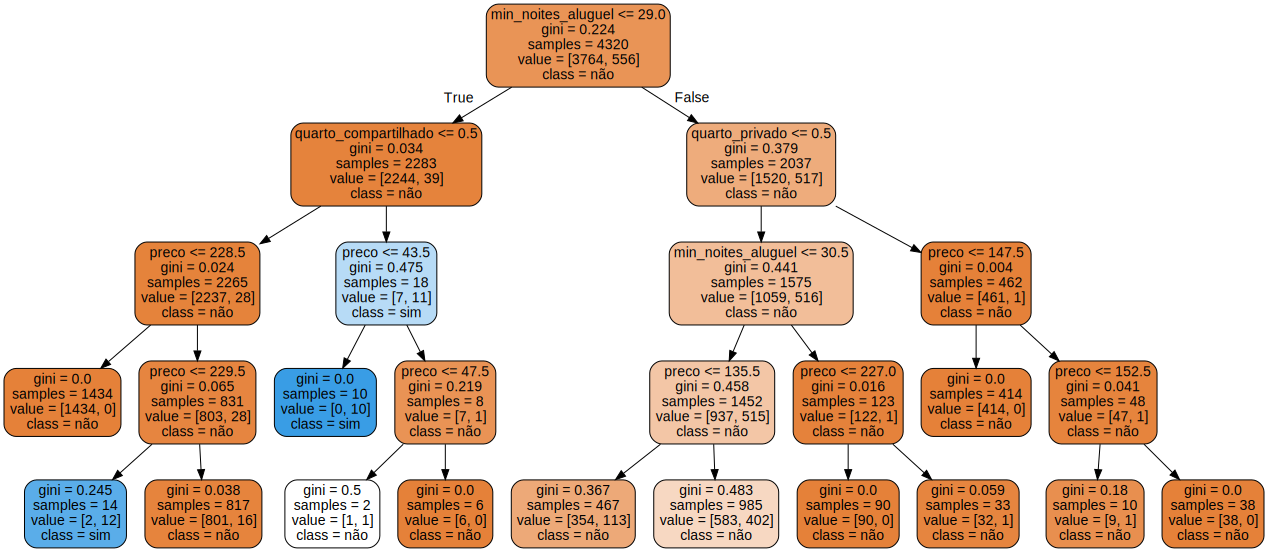

In [118]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
dot_date = export_graphviz(modelo, out_file = None)
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                          feature_names = features, class_names = ['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

In [124]:
colors = ('#b86b6d', '#f78a8ac')
edges = collections.defaultdict(list)

grafico = pydotplus.graph_from_dot_data(dot_data)
for edge in grafico.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = grafico.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
grafico.format = 'png'
grafico.write_png('tree.png')



True